In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
#load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Display the first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
# Summary statistics
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [10]:
# Drop CustomerID
df = df.drop(columns=["CustomerID"])

In [11]:
# Encode Gender
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [12]:
# Select features for clustering
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

In [13]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Using the Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

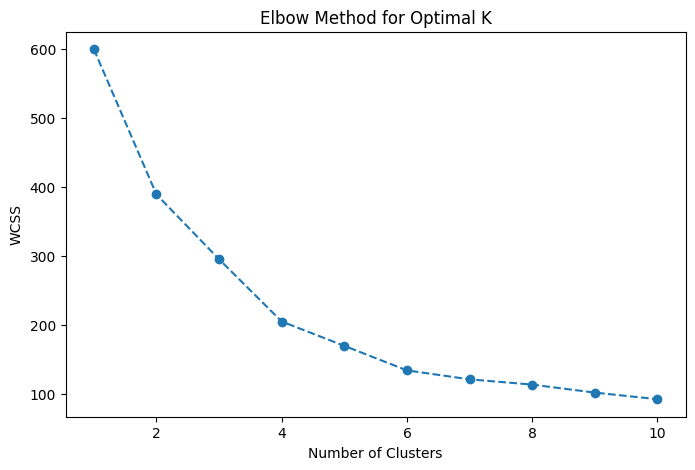

In [15]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

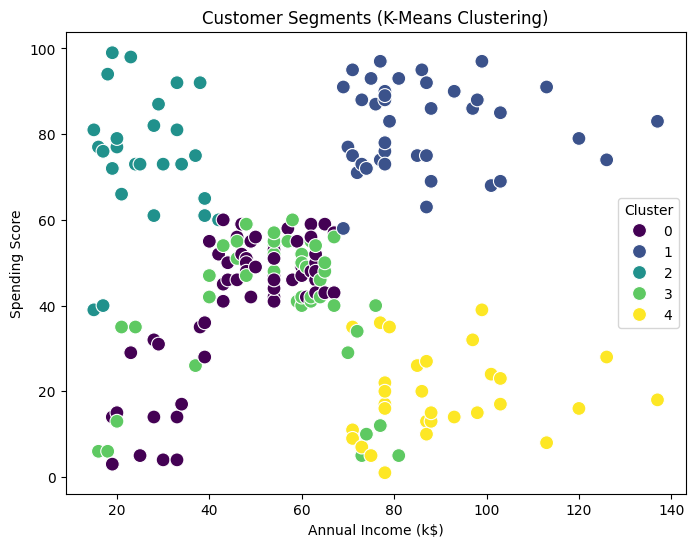

In [17]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"],
                hue=df["Cluster"], palette="viridis", s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segments (K-Means Clustering)")
plt.show()